In [1]:
# import libraries
import time
import itertools
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statistics import mean
%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1655994517.


Text(0.5, 1.0, 'Locations')

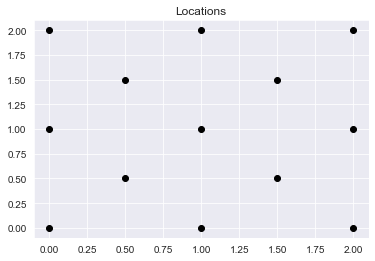

In [4]:
# create a set of points
len_x = 2
len_y = 2

points = [
    (x, y)
    for x in np.arange(0, len_x + 0.1, 0.5)
    for y in np.arange(0, len_y + 0.1, 0.5)
    if x % 1 == y % 1
]           

for x, y in points:
    plt.plot(x, y, 'ok')
    
plt.title('Locations')

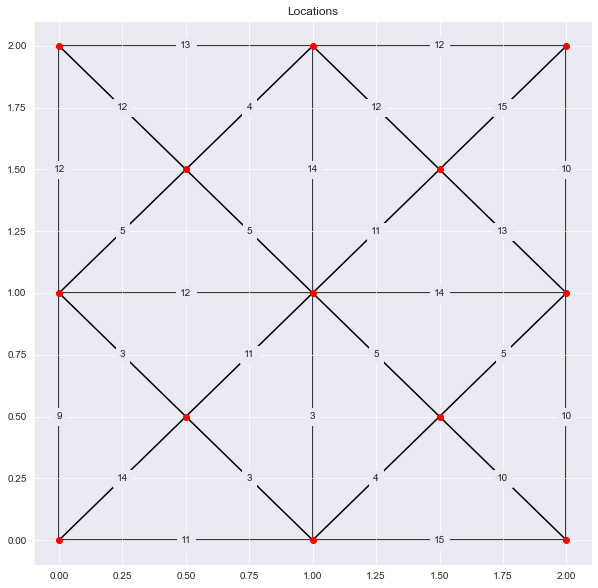

In [5]:
# create links between points
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# establish connections
links = {
    (points.index(p1), points.index(p2)): eucl(p1[0],p1[1],p2[0],p2[1])
    for p1, p2 in itertools.combinations(points, 2)
    if eucl(p1[0],p1[1],p2[0],p2[1]) <= 1 
    and not (p1[0] % 1 == p2[0] % 1 == 0.5)
}

# randomize travel costs
links = {
    (k[0], k[1]): r.randrange(3,16)
    for k in links.keys()
}

# plot the coverage
fig, ax = plt.subplots(figsize=(10,10))

for path, nb in links.items():
    point1 = points[path[0]]
    point2 = points[path[1]]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    
    plt.plot(x_values, y_values, 'k', linestyle="-", zorder=0)
    plt.text(
        mean(x_values), mean(y_values), nb, backgroundcolor='#eaeaf2',
        horizontalalignment='center', verticalalignment='center'
    )
    
for x, y in points:
    plt.plot(x, y, 'or')

plt.title('Locations')

# create traceback paths
links.update({
    (k[1], k[0]): v
    for k, v in links.items()
})

In [6]:
# reformat points into a savable form
points = pd.DataFrame(points).rename(columns={0: 'X', 1: 'Y'})
points.head()

,X,Y
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.5,0.5
4,0.5,1.5


In [7]:
# reformat links into a savable form
links = pd.DataFrame(links.values(), index=links.keys()).reset_index()
links = links.rename(columns={'level_0': 'P1', 'level_1': 'P2', 0: 'Cost'})
links.head()

,P1,P2,Cost
0,0,1,9
1,0,3,14
2,0,5,11
3,1,2,12
4,1,3,3


In [8]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    points.to_excel(writer, sheet_name='points', index=False)
    links.to_excel(writer, sheet_name='links', index=False)
    
print('Done')

Done
